In [44]:
# Si hizo una instalación local, puede omitir esta celda
#!pip install qiskit
#!pip install pylatexenc
#!pip install qiskit-aer

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
import numpy as np

In [46]:
from qiskit.quantum_info import random_statevector

In [47]:
from qiskit_aer import AerSimulator
backend =  AerSimulator(method='statevector')

# El protocolo de teletransportación cuántica

## Información preliminar:

Podemos agregar la instrucción *if* como en el siguiente ejemplo.

**En el simulador** podemos recuperar el estado del sistema, usando el método *save_statevector*.



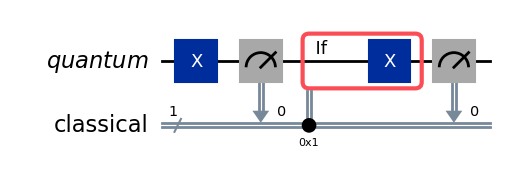

In [91]:
qr = QuantumRegister(1,'quantum')
cr = ClassicalRegister(1,'classical')
qc = QuantumCircuit(qr,cr)
qc.x(0)

qc.measure(qr,cr)

# El siguiente fragmento de código crea una compuerta X,
# si el resultado de la medición de qr es 1; es decir,
# si cr == 1

with qc.if_test((cr,1)):
    qc.x(0)

# Si no medimos nuevamente, obtendremos en "resultados",
# (ver siguiente celda) el valor de la medición previa

qc.measure(qr,cr)

qc.draw('mpl')

#qc.save_statevector()

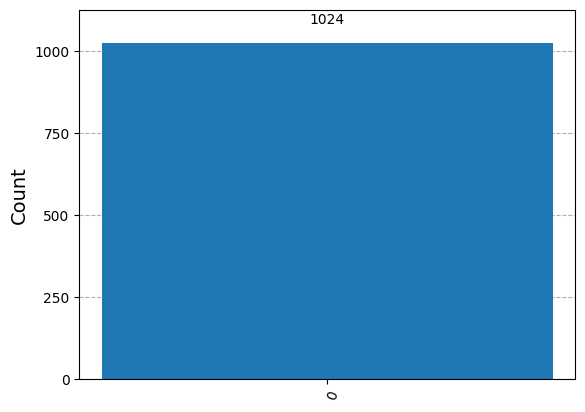

In [89]:
job = backend.run(qc,shots=1024)

resultados = job.result()
counts = resultados.get_counts()
plot_histogram(counts)

In [90]:
# Podemos leer el estado final de la simulación

resultados.get_statevector()

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


## Protocolo de teletransportación cuántica

### Inicializamos el circuito.

$\bullet$ $\psi$ es el qubit a teletransportar.

$\bullet$ $A$ es el qubit de Alice en el estado de Bell.

$\bullet$ $B$ es el qubit de Bob en el estado de Bell.

$\bullet$ $A_{psi}$ es el bit clásico donde Alice mide a $|\psi\rangle$

$\bullet$ $A_{bell}$ es el bit clásico donde Alice mide su qubit de Bell.

In [93]:
psi = QuantumRegister(1, "\psi")
A = QuantumRegister(1, "A")
B = QuantumRegister(1, "B")
A_psi = ClassicalRegister(1, "$A_{\psi}$")
A_bell = ClassicalRegister(1, "$A_{bell}$")

qc = QuantumCircuit(psi, A, B, A_psi, A_bell)

Preparamos el estado $$|\Phi^+\rangle=\frac{1}{\sqrt{2}}\big(|00\rangle+|11\rangle\big)$$

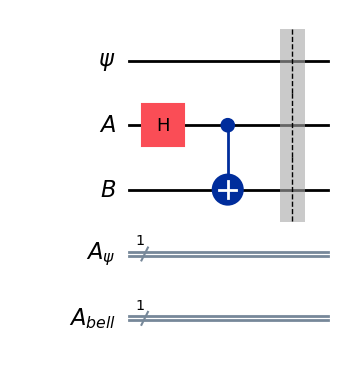

In [94]:
qc.h(A)
qc.cx(A, B)
qc.barrier()
qc.draw('mpl')

Alice opera con el qubit que desea enviar y su qubit en el estado de Bell:

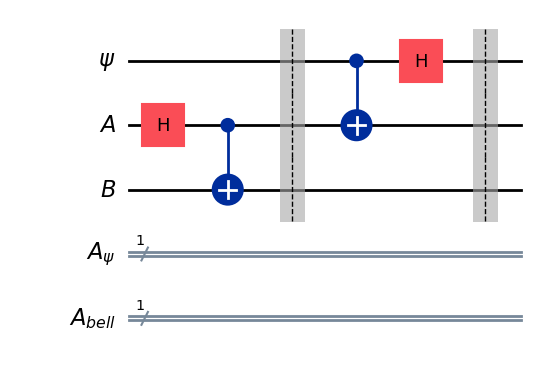

In [95]:
qc.cx(psi, A)
qc.h(psi)
qc.barrier()
qc.draw('mpl')

Alice mide sus qubits:

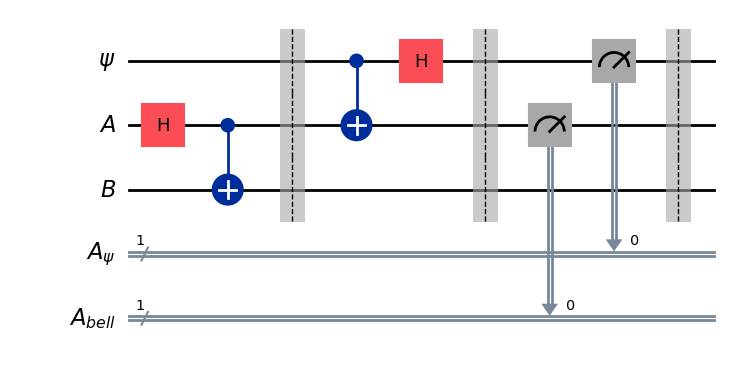

In [96]:
qc.measure(A, A_bell)
qc.measure(psi, A_psi)
qc.barrier()
qc.draw('mpl')

Bob aplica las acciones necesarias, dependiendo de lo que Alice le indique

In [66]:
with qc.if_test((A_bell, 1)):
    qc.x(B)
with qc.if_test((A_psi, 1)):
    qc.z(B)

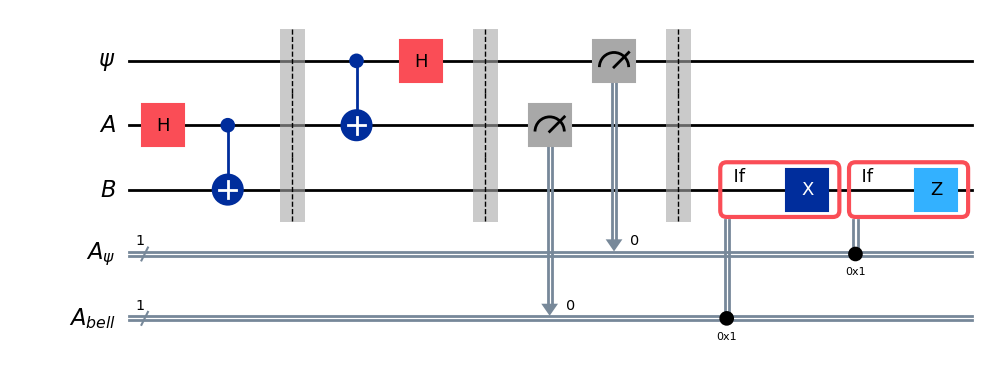

In [67]:
qc.draw('mpl')

Vamos a inicializar el qubit $|\psi\rangle$ en el estado $|1\rangle$
para verificar la implementación.

Aprovechamos para ver la opción *compose* en circuitos.

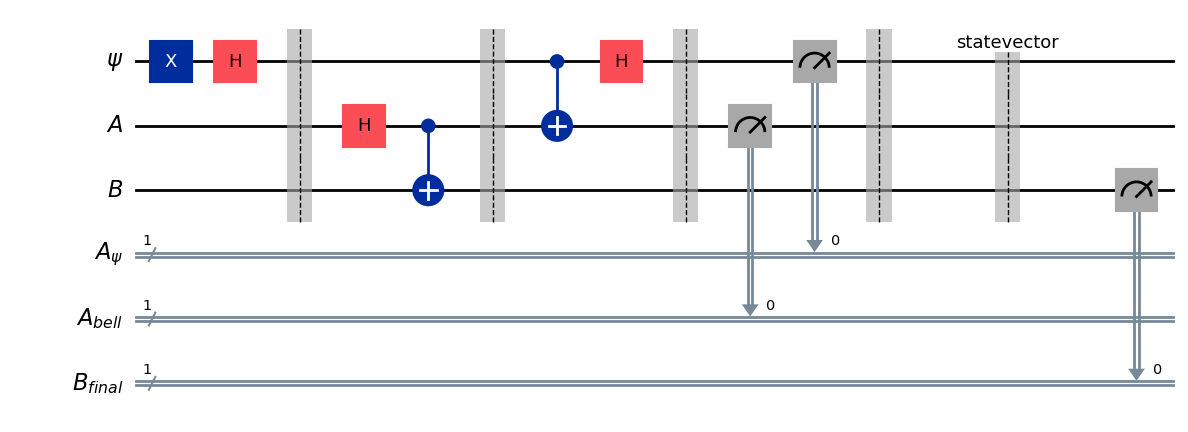

In [97]:
qc_prueba = QuantumCircuit(psi, A, B, A_psi, A_bell)

# qc_pruba inicia a psi en el estado |1>

qc_prueba.x(psi)
qc_prueba.h(psi)
qc_prueba.barrier()


# Unimos los circuitos

qc_prueba = qc_prueba.compose(qc)

qc_prueba.save_statevector()

# Bob mide su qubit

B_final = ClassicalRegister(1, "$B_{final}$")
qc_prueba.add_register(B_final)
qc_prueba.measure(B, B_final)

qc_prueba.draw('mpl')

Simulamos el circuito

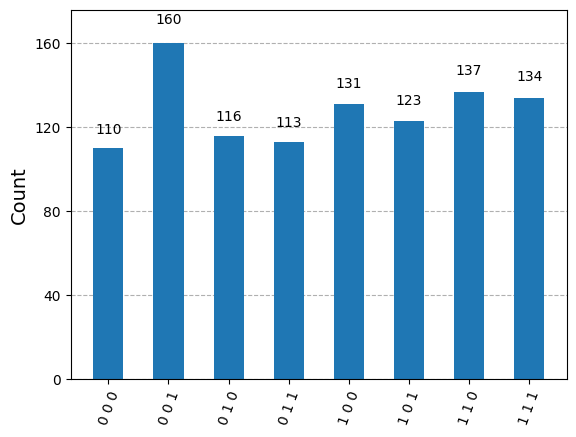

In [98]:
job = backend.run(qc_prueba,shots=1024)

resultados = job.result()
counts = resultados.get_counts()
plot_histogram(counts)

In [99]:
resultados.get_statevector()

Statevector([ 0.        +0.00000000e+00j,  0.70710678-8.65956056e-17j,
             -0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
             -0.        +0.00000000e+00j,  0.70710678-1.73191211e-16j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
            dims=(2, 2, 2))


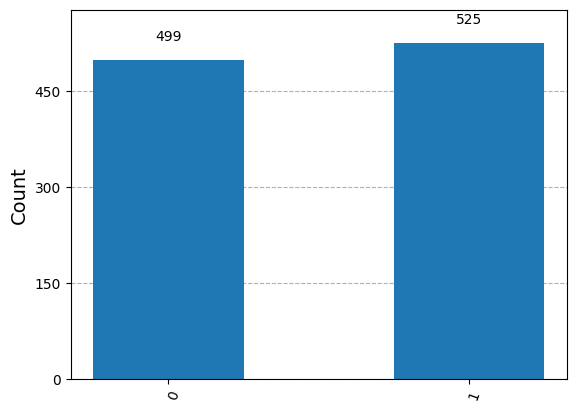

In [100]:
filtered_statistics = marginal_distribution(resultados.get_counts(), [2])
display(plot_histogram(filtered_statistics))

$\bullet$ Verifique el circuito para el estado $|-\rangle$, usando qiskit o el quantum composer.

$\bullet$ Ahora empezando en un estado aleatorio.

In [72]:
from qiskit.visualization import plot_bloch_multivector, array_to_latex

<IPython.core.display.Latex object>

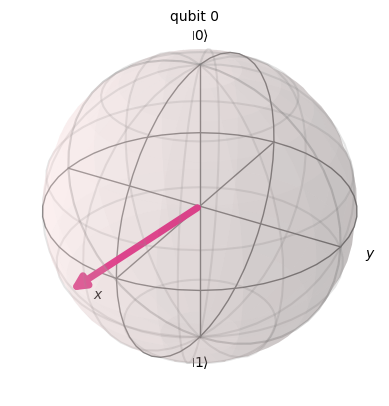

In [81]:
psi_ini = random_statevector(2)

display(array_to_latex(psi_ini, prefix="|\\psi\\rangle = "))
plot_bloch_multivector(psi_ini)

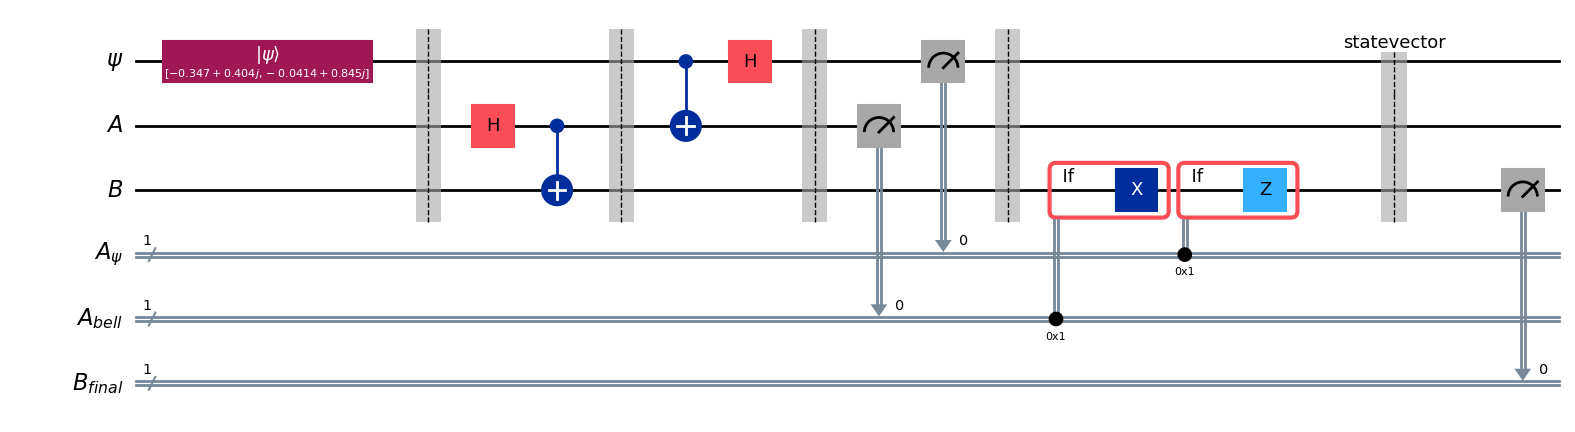

In [82]:
qc_prueba = QuantumCircuit(psi, A, B, A_psi, A_bell)

# qc_pruba inicia a psi en el estado |1>

qc_prueba.initialize(psi_ini,0) 
qc_prueba.barrier()


# Unimos los circuitos

qc_prueba = qc_prueba.compose(qc)

qc_prueba.save_statevector()

# Bob mide su qubit

B_final = ClassicalRegister(1, "$B_{final}$")
qc_prueba.add_register(B_final)
qc_prueba.measure(B, B_final)

qc_prueba.draw('mpl')

Simulamos el circuito

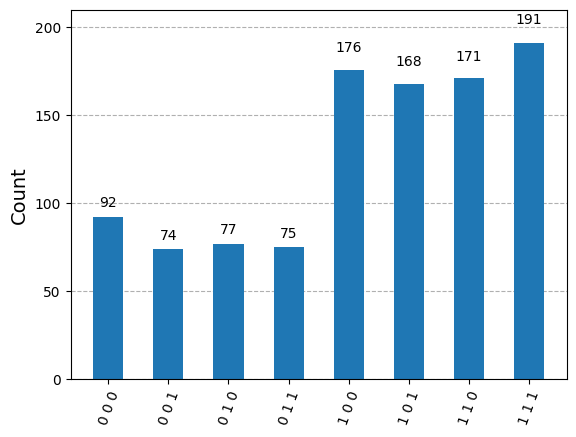

In [83]:
job = backend.run(qc_prueba,shots=1024)

resultados = job.result()
counts = resultados.get_counts()
plot_histogram(counts)

In [84]:
resultados.get_statevector()

Statevector([-0.        +0.j        , -0.3473347 +0.40369725j,
             -0.        +0.j        ,  0.        +0.j        ,
              0.        -0.j        , -0.04144113+0.84538143j,
              0.        -0.j        ,  0.        -0.j        ],
            dims=(2, 2, 2))


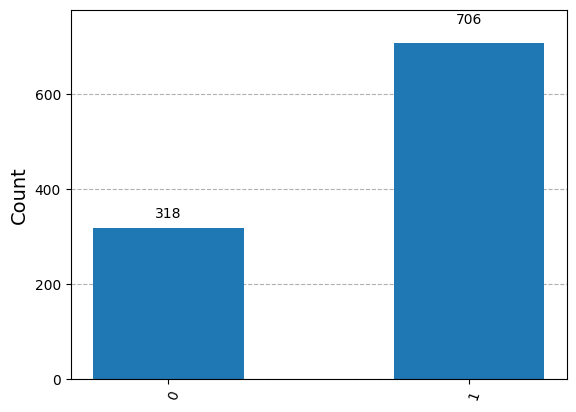

In [85]:
filtered_statistics = marginal_distribution(resultados.get_counts(), [2])
display(plot_histogram(filtered_statistics))

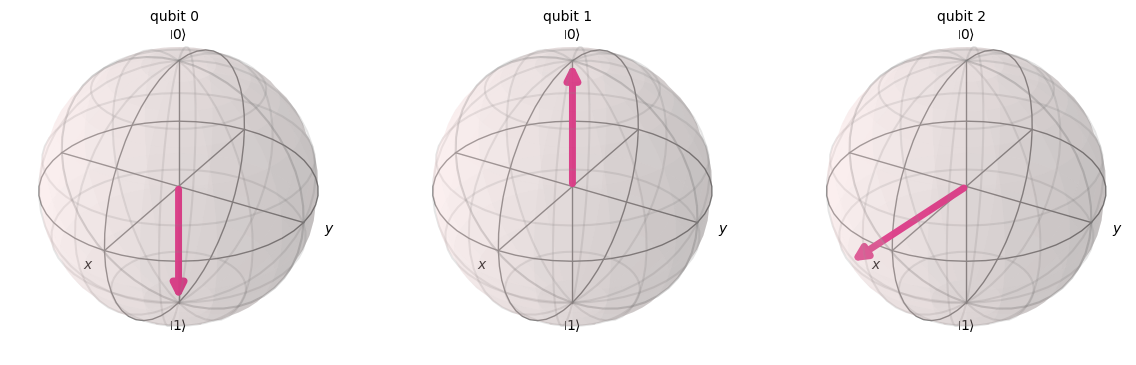

In [86]:
plot_bloch_multivector(resultados.get_statevector())